In [83]:
import warnings
import pickle

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn import neighbors

In [84]:
warnings.filterwarnings(action='once')

In [85]:
bill = pd.read_csv('billets_final.csv')

In [86]:
bill.sample(5)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
1491,True,172.02,104.23,103.72,4.136494,2.99,113.37
1489,True,172.09,103.74,103.52,4.237915,3.02,112.78
661,True,172.05,103.90,103.76,4.520000,2.71,113.42
933,True,171.79,103.77,104.00,4.100000,3.05,112.67
341,True,172.08,104.17,103.48,4.620000,2.87,113.52


<br>

# Data preparation

> ## X & y

In [87]:
X = bill.drop(columns='is_genuine', axis=0)
y = bill.is_genuine

In [88]:
y = y.values.reshape(y.shape[0],1)

> ## Test train split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

> ## Fonction d'affichage des scores

In [90]:
def score(model):
    tr_score = model.score(X_train, y_train).round(4)
    te_score = model.score(X_test, y_test).round(4)
    print(f"Score train: {tr_score} \nScore test: {te_score}")

<br>

# Modelisation

> ## Dummy classifier

In [91]:
dc_model = Pipeline([
    ('scale', StandardScaler()),
    ('model', DummyClassifier(strategy='most_frequent'))
     ])
dc_model.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('model', DummyClassifier(strategy='most_frequent'))])

In [92]:
y_pred = dc_model.predict(X_test)

In [93]:
score(dc_model)

Score train: 0.6633 
Score test: 0.68


In [94]:
mat = pd.DataFrame(confusion_matrix(y_test, y_pred))
mat

,0,1
0,0,96
1,0,204


> ## Logistic regression

>> ### Vérification des conditions de la régression

>>> #### Significativité des variables:

In [95]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [96]:
X_stat = sm.add_constant(X)
log_reg = sm.Logit(endog=y, exog=X_stat,
                   data=bill).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.028321
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1500
Model:                          Logit   Df Residuals:                     1493
Method:                           MLE   Df Model:                            6
Date:                Sat, 17 Dec 2022   Pseudo R-squ.:                  0.9555
Time:                        19:02:39   Log-Likelihood:                -42.481
converged:                       True   LL-Null:                       -954.77
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -203.9841    241.233     -0.846      0.398    -676.792     268.824
diagonal         0.066

C:\Users\steph\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [97]:
log_reg2 = smf.glm('is_genuine~diagonal+height_left+height_right+margin_low+margin_up+length',
                   data=bill, family=sm.families.Binomial()).fit()
print(log_reg2.summary())

                             Generalized Linear Model Regression Results                             
Dep. Variable:     ['is_genuine[False]', 'is_genuine[True]']   No. Observations:                 1500
Model:                                                   GLM   Df Residuals:                     1493
Model Family:                                       Binomial   Df Model:                            6
Link Function:                                         logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -42.481
Date:                                       Sat, 17 Dec 2022   Deviance:                       84.962
Time:                                               19:02:39   Pearson chi2:                 2.63e+03
No. Iterations:                                           10                                         
Covariance Type:                                   nonrobust                      

In [98]:
log_reg2 = smf.glm('is_genuine~height_left+height_right+margin_low+margin_up+length',
                   data=bill, family=sm.families.Binomial()).fit()
print(log_reg2.summary())

                             Generalized Linear Model Regression Results                             
Dep. Variable:     ['is_genuine[False]', 'is_genuine[True]']   No. Observations:                 1500
Model:                                                   GLM   Df Residuals:                     1494
Model Family:                                       Binomial   Df Model:                            5
Link Function:                                         logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -42.483
Date:                                       Sat, 17 Dec 2022   Deviance:                       84.966
Time:                                               19:02:39   Pearson chi2:                 2.63e+03
No. Iterations:                                           10                                         
Covariance Type:                                   nonrobust                      

In [99]:
log_reg2 = smf.glm('is_genuine~height_right+margin_low+margin_up+length',
                   data=bill, family=sm.families.Binomial()).fit()
print(log_reg2.summary())

                             Generalized Linear Model Regression Results                             
Dep. Variable:     ['is_genuine[False]', 'is_genuine[True]']   No. Observations:                 1500
Model:                                                   GLM   Df Residuals:                     1495
Model Family:                                       Binomial   Df Model:                            4
Link Function:                                         logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -43.744
Date:                                       Sat, 17 Dec 2022   Deviance:                       87.487
Time:                                               19:02:39   Pearson chi2:                 3.20e+03
No. Iterations:                                           10                                         
Covariance Type:                                   nonrobust                      

>>> #### Colinéarité des variables (VIF):

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [101]:
variables = log_reg2.model.exog
[variance_inflation_factor(variables, i).round(2) 
 for i in np.arange(1,variables.shape[1])]

[1.25, 1.91, 1.41, 2.11]

>> ### Préparation des données

>>> #### X & y

In [102]:
X = bill.drop(columns=['is_genuine', 'diagonal', 'height_left'], axis=0)
y = bill.is_genuine

In [103]:
#y = y.values.reshape(y.shape[0],1)

>>> #### Test train split

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

>> ### Pipeline et prédiction (paramètres par défaut)

In [105]:
log_reg_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('model', LogisticRegression())
    ])

In [106]:
log_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()), ('model', LogisticRegression())])

In [107]:
y_pred = log_reg_pipe.predict(X_test)

In [108]:
score(log_reg_pipe)
pd.DataFrame(confusion_matrix(y_test, y_pred))

Score train: 0.9925 
Score test: 0.9867


,0,1
0,92,4
1,0,204


>> ### Hyper-paramètres

In [109]:
params={'model__C': np.logspace(-3,3,7),
        'model__penalty':['l1', 'l2'],
        'model__solver':['newton-cg', 'lbfgs', 'liblinear']
       }

In [110]:
grid = GridSearchCV(log_reg_pipe,
                    params,
                    cv=4,
                    return_train_score=True,
                    verbose=1)
grid.fit(X_train, y_train)

Fitting 4 folds for each of 42 candidates, totalling 168 fits


C:\Users\steph\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\steph\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\steph\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\steph\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\steph\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, 

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', LogisticRegression())]),
             param_grid={'model__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'model__penalty': ['l1', 'l2'],
                         'model__solver': ['newton-cg', 'lbfgs', 'liblinear']},
             return_train_score=True, verbose=1)

In [111]:
res = pd.DataFrame(grid.cv_results_)

In [112]:
cols = [i for i in res.columns if 'split' not in i]

In [113]:
res = res[cols]
res = res.sort_values('rank_test_score')
res.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__penalty,param_model__solver,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
20,0.012293,0.007130,0.004345,0.006941,1.0,l1,liblinear,"{'model__C': 1.0, 'model__penalty': 'l1', 'mod...",0.992500,0.005465,1,0.993056,0.001643
23,0.016688,0.000282,0.000000,0.000000,1.0,l2,liblinear,"{'model__C': 1.0, 'model__penalty': 'l2', 'mod...",0.992500,0.005465,1,0.993056,0.001443
14,0.005401,0.006387,0.000499,0.000863,0.1,l1,liblinear,"{'model__C': 0.1, 'model__penalty': 'l1', 'mod...",0.992500,0.005465,1,0.992500,0.001822
39,0.034072,0.004849,0.002235,0.001785,1000.0,l2,newton-cg,"{'model__C': 1000.0, 'model__penalty': 'l2', '...",0.991667,0.005000,4,0.992500,0.001211
38,0.004163,0.007211,0.000000,0.000000,1000.0,l1,liblinear,"{'model__C': 1000.0, 'model__penalty': 'l1', '...",0.991667,0.005000,4,0.992500,0.001211


In [114]:
print("Best Estimator: \n{}\n".format(grid.best_estimator_))
print("Best Parameters: \n{}\n".format(grid.best_params_))
print("Best Test Score: \n{}\n".format(grid.best_score_))
print("Best Training Score: \n{}\n".format(grid.cv_results_['mean_train_score'][grid.best_index_]))

Best Estimator: 
Pipeline(steps=[('scale', StandardScaler()),
                ('model',
                 LogisticRegression(C=0.1, penalty='l1', solver='liblinear'))])

Best Parameters: 
{'model__C': 0.1, 'model__penalty': 'l1', 'model__solver': 'liblinear'}

Best Test Score: 
0.9924999999999999

Best Training Score: 
0.9925



In [115]:
best_params = grid.best_params_
best_params.keys()

dict_keys(['model__C', 'model__penalty', 'model__solver'])

In [116]:
#for i in best_params.keys():
    #j =  i.replace('model__', '')
    #best_params[j] = best_params.pop(i)
#best_params

In [117]:
log_reg_best = Pipeline([
    ('scale', StandardScaler()),
    ('model', LogisticRegression(C=1,solver='newton-cg',  penalty='l2'))
    ])

In [118]:
log_reg_best.fit(X_train, y_train)
y_pred_best = log_reg_best.predict(X_test)

In [119]:
score(log_reg_best)
pd.DataFrame(confusion_matrix(y_test, y_pred_best))

Score train: 0.9925 
Score test: 0.9867


,0,1
0,92,4
1,0,204


>> ### Metrics

>>> #### Matrice de confusion

In [120]:
conf_lr = pd.DataFrame(confusion_matrix(y_test, y_pred))
conf_lr

,0,1
0,92,4
1,0,204


>>> #### Accuracy:

In [121]:
accuracy_score(y_test, y_pred).round(4)

0.9867

In [122]:
np.unique(y_pred,  return_counts=True)

(array([False,  True]), array([ 92, 208], dtype=int64))

>>> #### Precision/Recall/F1-score:

In [123]:
precision_score(y_test, y_pred).round(3)

0.981

In [124]:
recall_score(y_test, y_pred).round(3)

1.0

In [125]:
f1_score(y_test, y_pred).round(3)

0.99

In [126]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      0.96      0.98        96
        True       0.98      1.00      0.99       204

    accuracy                           0.99       300
   macro avg       0.99      0.98      0.98       300
weighted avg       0.99      0.99      0.99       300



>>> #### ROC curve:

In [127]:
y_pred_proba = log_reg_pipe.predict_proba(X_test)[::,1]
false_positive_rate, true_positive_rate,thresholds = roc_curve(y_test, y_pred_proba)

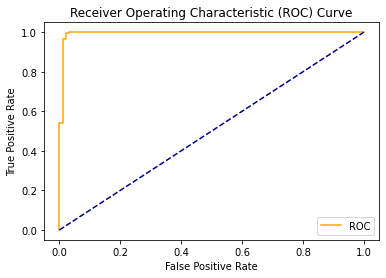

In [128]:
plt.plot(false_positive_rate, true_positive_rate, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [129]:
auc = roc_auc_score(y_test,y_pred_proba)
print('AUC: %.4f' % auc)

AUC: 0.9948


>>> #### Probabilités

In [130]:
y_prob = pd.DataFrame(log_reg_pipe.predict_proba(X_test).round(2), columns=['Faux', 'Vrai'])
y_prob.sample(10)

,Faux,Vrai
173,0.00,1.00
70,0.94,0.06
137,0.00,1.00
5,0.02,0.98
33,1.00,0.00
149,0.00,1.00
219,0.00,1.00
238,0.02,0.98
233,0.36,0.64
79,0.38,0.62


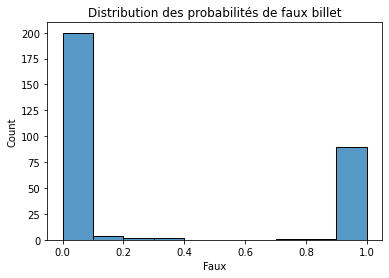

In [131]:
sns.histplot(y_prob['Faux'])
plt.title('Distribution des probabilités de faux billet')
plt.show()

>> ### Script (Pickle)

In [132]:
with open('model_file.pkl', 'wb') as file:
    pickle.dump(log_reg_pipe, file)

In [133]:
file = open('model_file.pkl', 'rb')
data = pickle.load(file)
data

Pipeline(steps=[('scale', StandardScaler()), ('model', LogisticRegression())])

In [134]:
file.close()

<br>

> ## K-means

>> ### Modèle

In [135]:
X_init = bill.drop(columns='is_genuine', axis=0)

In [136]:
km_model=KMeans(n_clusters=2, init='k-means++', random_state=103)
km_model.fit(X_init)

KMeans(n_clusters=2, random_state=103)

In [137]:
np.unique(km_model.labels_, return_counts=True)

(array([0, 1]), array([ 484, 1016], dtype=int64))

In [138]:
bill['Labels K'] = km_model.labels_

In [139]:
centroids  = km_model.cluster_centers_
centroids

array([[171.89849174, 104.19301653, 104.14485537,   5.23785755,
          3.3472314 , 111.5918595 ],
       [171.98699803, 103.95165354, 103.81333661,   4.12430421,
          3.0582185 , 113.19615157]])

>> ### Metrics

>>> #### Matrice de confusion

In [140]:
conf_k = pd.DataFrame(confusion_matrix(bill['is_genuine'], bill['Labels K']))
conf_k

,0,1
0,481,19
1,3,997


In [141]:
np.unique(bill['Labels K'],  return_counts=True)

(array([0, 1]), array([ 484, 1016], dtype=int64))

>>> #### Accuracy:

In [142]:
accuracy_score(bill['is_genuine'], bill['Labels K']).round(4)

0.9853

>>> #### Precision/Recall/F1-score:

In [143]:
precision_score(bill['is_genuine'], bill['Labels K']).round(3)

0.981

In [144]:
recall_score(bill['is_genuine'], bill['Labels K']).round(3)

0.997

In [145]:
f1_score(bill['is_genuine'], bill['Labels K']).round(3)

0.989

In [146]:
print(classification_report(bill['is_genuine'], bill['Labels K']))

              precision    recall  f1-score   support

       False       0.99      0.96      0.98       500
        True       0.98      1.00      0.99      1000

    accuracy                           0.99      1500
   macro avg       0.99      0.98      0.98      1500
weighted avg       0.99      0.99      0.99      1500



<br>

> ## KNN

In [147]:
X = bill.drop(columns='is_genuine', axis=0)
y = bill.is_genuine

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [149]:
#y_train = y_train.values.reshape(y_train.shape[0],1)
#y_test = y_test.values.reshape(y_test.shape[0],1)

>> ### Modèle

In [150]:
error_rate = []
for i in range(1,40):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

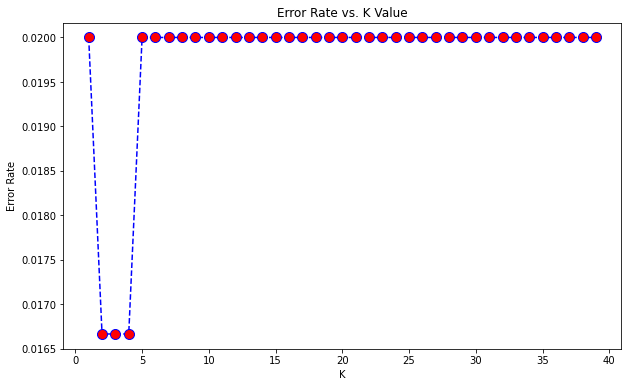

In [151]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [152]:
knn = neighbors.KNeighborsClassifier(n_neighbors=2) 
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

>> ### Metrics

In [153]:
conf_knn = pd.DataFrame(confusion_matrix(y_test,pred))
conf_knn

,0,1
0,92,4
1,1,203


In [154]:
accuracy_score(y_test,pred).round(4)

0.9833

In [155]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       False       0.99      0.96      0.97        96
        True       0.98      1.00      0.99       204

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300

